# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Matthew De Filippo 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
(X, y) = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [4]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Import the Decision Tree, Random Forest, and Gradient Boosting Machines regression models from sklearn.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Decision Tree Regressor model with max_depth=5; random_state=0.
model_decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)

# Instantiate the Random Forest Classifier model with max_depth=5; random_state=0; max_features='sqrt' (default); 
# n_estimators=100 (default). 
model_random_forest = RandomForestRegressor(max_depth=5, random_state=0, max_features='sqrt', n_estimators=100)

# Instantiate the Gradient Boosting Classifier model with max_depth=5; random_state=0; n_estimators=100 (default). 
model_gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

# Implement each machine learning model with X and y.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model_decision_tree.fit(X_train, y_train)
model_random_forest.fit(X_train, y_train)
model_gradient_boosting.fit(X_train, y_train)

# Calculate the average training and validation accuracy using mean squared error with cross-validation.
from sklearn.model_selection import cross_validate
scores_decision_tree = cross_validate(model_decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
scores_random_forest = cross_validate(model_random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
scores_gradient_boosting = cross_validate(model_gradient_boosting, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [5]:
# Create a pandas DataFrame results with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB.
# Add the results to the dataframe.
results = pd.DataFrame({'ML Model': ['DT', 'RF', 'GB'], 
                        'Training Accuracy': [-scores_decision_tree['train_score'].mean(), -scores_random_forest['train_score'].mean(), -scores_gradient_boosting['train_score'].mean()], 
                        'Validation Accuracy': [-scores_decision_tree['test_score'].mean(), -scores_random_forest['test_score'].mean(), -scores_gradient_boosting['test_score'].mean()]})
# Print the results
results

,ML Model,Training Accuracy,Validation Accuracy
0,DT,47.822974,74.045335
1,RF,49.158648,67.723347
2,GB,3.694308,23.546500


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [6]:
# TO DO: ADD YOUR CODE HERE
# Calculate the average training and validation accuracy using R2 score with cross-validation.
from sklearn.model_selection import cross_validate
scores_decision_tree = cross_validate(model_decision_tree, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
scores_random_forest = cross_validate(model_random_forest, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
scores_gradient_boosting = cross_validate(model_gradient_boosting, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

# Create a pandas DataFrame results with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB.
# Add the results to the dataframe.
results = pd.DataFrame({'ML Model': ['DT', 'RF', 'GB'], 
                        'Training Accuracy': [scores_decision_tree['train_score'].mean(), scores_random_forest['train_score'].mean(), scores_gradient_boosting['train_score'].mean()], 
                        'Validation Accuracy': [scores_decision_tree['test_score'].mean(), scores_random_forest['test_score'].mean(), scores_gradient_boosting['test_score'].mean()]})
# Print the results
results

,ML Model,Training Accuracy,Validation Accuracy
0,DT,0.830437,0.735184
1,RF,0.825750,0.758736
2,GB,0.986903,0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

#### Question 1 Response:
In assignment 2, we used a linear regression model and achieved training and validation r^2 scores of 0.61 and 0.64 respectively. As shown above, the results we have achieved with each of the decision tree, random forest, and gradient boosting models are superior. The best result was achieved with the gradient boosting model for which we achieved training and validation r^2 scores of 0.99 and 0.92 respectively.

#### Question 2 Response:
Out of the models tested, I would select the gradient boosting regressor because it achieved the best training and validation r^2 scores of 0.99 and 0.92 respectively. 

#### Question 3 Response:
For the tree-based models, in order to improve accuracy we could look at increasing the amount of n_estimators or modifying the number of max_features.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

#### Question 1
The code was created by referencing the provided examples contained in Lab 4 - Decision Trees and SVC. I referenced and adapted the approach provided in the example to suit the assignment requirements.

#### Question 2
I completed the steps in the suggested order: 1 -> 2 -> 3 -> 4 -> 5.

#### Question 3
I did not use generative AI to complete this assignment.

#### Question 4
Yes. One issue I ran into was that I had originally used 'Classifier' decision tree and random forest models instead of 'Regressor. As a result, I was getting poor MSE and R^2 values. I asked a friend to review my code and he helped me to notice the issue.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [48]:
# TO DO: Import wine dataset
wine_df = pd.read_csv('wine.data', names = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'] )
X = wine_df.drop(['class'], axis=1)
y = wine_df['class']

print(f'The size of X is: {X.size}')
print(f'The shape of X is: {X.shape}')
print(f'The type of X is:\n{X.dtypes}\n')

print(f'The size of y is: {y.size}')
print(f'The shape of y is: {y.shape}')
print(f'The type of y is:\n{y.dtypes}')

The size of X is: 2314
The shape of X is: (178, 13)
The type of X is:
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

The size of y is: 178
The shape of y is: (178,)
The type of y is:
int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [43]:
# TO DO: ADD YOUR CODE HERE
wine_df.head(5)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [44]:
# TO DO: ADD YOUR CODE HERE
print('Running X.isnull().sum() gives:\n')
print(X.isnull().sum())
print(f'Running y.isnull().sum() gives: {y.isnull().sum()}')

# Based on these results, we see that there are no missing values in our dataset.

Running X.isnull().sum() gives:

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64
Running y.isnull().sum() gives: 0


How many samples do we have of each type of wine?

In [47]:
# TO DO: ADD YOUR CODE HERE
y.value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [56]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Import SVC and DecisionTreeClassifier.
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Instantiate models as SVC() and DecisionTreeClassifier(max_depth = 3).
model_svc = SVC()
model_decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)

# Implement the machine learning model with X and y.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model_svc.fit(X_train, y_train)
model_decision_tree.fit(X_train, y_train)

# Calculate the average training and validation accuracy using cross_validate for the two different models.
from sklearn.model_selection import cross_validate
scores_svc = cross_validate(model_svc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
scores_decision_tree = cross_validate(model_decision_tree, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Create a pandas DataFrame results with columns: Training accuracy and Validation accuracy.
results = pd.DataFrame({'ML Model': ['SVC', 'DT'], 
                        'Training Accuracy': [scores_svc['train_score'].mean(), scores_decision_tree['train_score'].mean()], 
                        'Validation Accuracy': [scores_svc['test_score'].mean(), scores_decision_tree['test_score'].mean()]})

results

,ML Model,Training Accuracy,Validation Accuracy
0,SVC,0.698882,0.662808
1,DT,0.994721,0.929310


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [61]:
# TO DO: Implement best model
# The decision tree model gave the best results. 
# Therefore, we will use that to print the confusion matrix and classification report.

predictions = model_decision_tree.predict(X_val)

Text(170.97222222222223, 0.5, 'True Value')

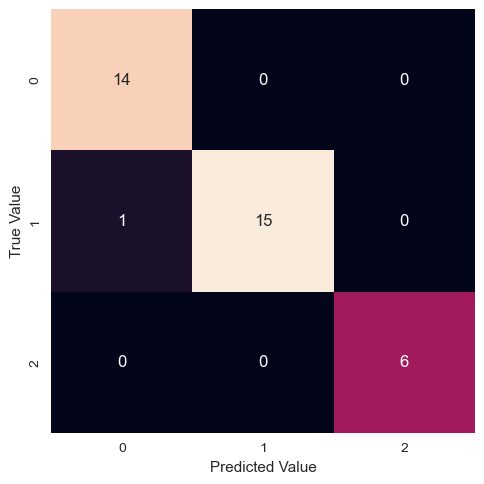

In [66]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, predictions)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [64]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, predictions, target_names=["1", "2", "3"], zero_division=0))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

#### Question 1
With the SVC model, we achieve training and validation accuracies of 0.70 and 0.66 respectively. The best results are achieved with the decision tree classifier model; with this model, we achieve training and validation accuracies of 0.99 and 0.93 respectively.

#### Question 2
Two potential reasons that the support vector machines model did not work as well are:
 - We have not applied careful tuning of the required parameters such as C and gamma. We have simply applied the default values by using SVC().
 - No pre-processing has been performed.

#### Question 3
One sample was incorrectly classified in step 5.2. A single class 2 value was incorrectly classified as a class 1 value. All other values were correctly classified.

#### Question 4
Recall calculates the number of actual positives that we captured (true positives divided by total number of positives). Recall is important when the cost of false negatives is high.

Precision calculates the number of samples that were predicted positive and are actually positive (true positives divided by total number of positive predictions). Precision is important when the cost of false positives is high.

In this case, it can be argued that the cost of a false positive is higher as this would mislead the user to potentially purchase a bottle of wine that was not sourced from a particular cultivar. We can therefore prioritize precision in this scenario.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

#### Question 1
The code was created by referencing the provided examples contained in the lecture notes particularly "SVM" and "Decision Trees Example". I referenced and adapted the approach provided in the example to suit the assignment requirements.

#### Question 2
I completed the steps in the suggested order: 1 -> 2 -> 3 -> 4 -> 5.

#### Question 3
I did not use generative AI to complete this assignment.

#### Question 4
No; I did not run into any issues on this part of the assignment. Referencing the referenced examples and reviewing final findings with classmates helped me to be successful.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

#### Part 1 - Regression

As shown above, the results we have achieved with each of the decision tree, random forest, and gradient boosting models are superior to those achieved on Assignment 2 using linear regression. The best result was achieved with the gradient boosting model for which we achieved training and validation r^2 scores of 0.99 and 0.92 respectively.

This demonstrates the importance of finding a model that can adequately fit the data you are working with.

#### Part 2 - Classification

In this exercise, we classified wine based on 13 different attributes. Two models were used: an SVC() and a DecisionTreeClassifier(). The decision tree resulted in superior performance based on the calculated training and validation accuracy scores. This confirms the importance of pre-processing and tweaking parameters when working with SVC models; we did not perform these steps in this exercise and therefore did not achieve great results. The decision tree on the other hand was able to achieve fairly good results without any tweaking of parameters required.



## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked the opportunity to apply more types of models and try them out on real datasets. It was interesting to see the results and relate them to the concepts learned in the lecture. This helped to reinforce the lecture material and gave a more clear understanding of the discussed concepts.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [67]:
# TO DO: ADD YOUR CODE HERE
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Import LinearSVC.
from sklearn.svm import LinearSVC

# Instantiate models as SVC() and DecisionTreeClassifier(max_iter = 5000).
model_lsvc = LinearSVC()

# Implement the machine learning model with X and y.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model_lsvc.fit(X_train, y_train)

# Calculate the average training and validation accuracy using cross_validate for the two different models.
scores_lsvc = cross_validate(model_lsvc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Create a pandas DataFrame results with columns: Training accuracy and Validation accuracy.
results = pd.DataFrame({'ML Model': ['LinearSVC'], 
                        'Training Accuracy': [scores_lsvc['train_score'].mean()], 
                        'Validation Accuracy': [scores_lsvc['test_score'].mean()]})

results

C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

,ML Model,Training Accuracy,Validation Accuracy
0,LinearSVC,0.852243,0.810591


*ANSWER HERE*

Yes. Using LinearSVC improved the results when compared to the standard SVC model. Training accuracy improved from 0.70 to 0.85; validation accuracy improved from 0.66 to 0.81.

While it is better than SVC, I would still not say that LinearSVC is a good fit for this dataset as superior results are achieved by using the DecisionTreeClassifier.

